In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

<Figure size 7680x5760 with 0 Axes>

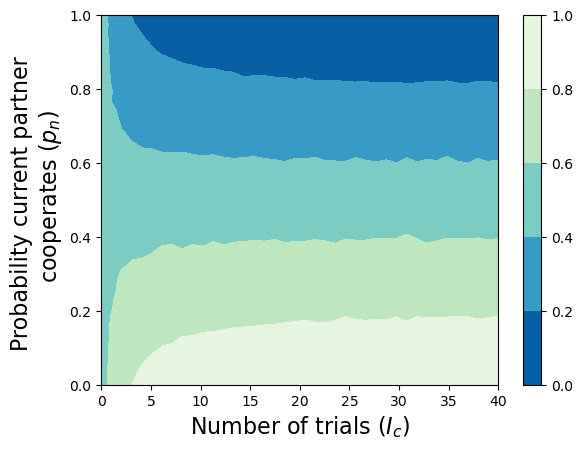

In [37]:
def probability_at_time(p, n_trials_cur, n_trials_pop): # p is probability of current partner coop; n_total is the number of trials
    a = 1
    b = 1

    pc = 0.5 # probability of focal cooperating
    pop_info = 0
    p_cur = p # probability of current partner coop
    p_pop = 0.75 #p_cur * 2 # probability of population coop
    switch_fit_multiplier = 1

    if p_pop > 1:
        p_pop = 1

    n_coop_cur = p_cur * n_trials_cur
    n_coop_pop = p_pop * n_trials_pop
    # n_coop_pop = 0
    # synergy = 1 + cur_trials * 0.01 
    # updated_p = min(p + n_total * 0.01, 1)

    T = 0.8 # D / C
    R = 0.6 # C / C
    P = 0.4 # D / D
    S = 0.2 # C / D
    
    a_cur = a + pop_info * n_coop_pop
    b_cur = b + pop_info * (n_trials_pop - n_coop_pop)
    
    # current_a = a + n_coop_cur
    # current_b = b + (n_trials_cur - n_coop_cur) 
    current_a = a_cur + n_coop_cur
    current_b = b_cur + (n_trials_cur - n_coop_cur)
    population_a = a + pop_info * n_coop_pop
    population_b = b + pop_info * (n_trials_pop - n_coop_pop)

    samples_current = stats.beta.rvs(current_a, current_b, size=10000)
    samples_population = stats.beta.rvs(population_a, population_b, size=10000)

    staying_fitness =  (
            samples_current * (pc * R + (1 - pc) * T) +
            (1 - samples_current) * (pc * S + (1 - pc) * P)
        )

    switching_fitness =  (
            samples_population * (pc * R + (1 - pc) * T) +
            (1 - samples_population) * (pc * S + (1 - pc) * P)
        )

    payoff_difference = (switching_fitness * switch_fit_multiplier) - staying_fitness
    ps = np.mean(payoff_difference > 0)

    return ps #list([np.mean(payoff), ps, samples_current, samples_population, np.std(payoff)])

n_t = 40
p = np.linspace(0, 1, n_t)
n_total = np.linspace(0, n_t, n_t)

P, N_TOTAL = np.meshgrid(p, n_total)

Z = np.zeros_like(P)
for i in range(len(p)):
    for j in range(len(n_total)):
        Z[i, j] = probability_at_time(p[i], n_total[j], n_total[j])

# plt.pcolormesh(N_TOTAL, P, Z.T, cmap="GnBu_r")
# plt.colorbar()
# # plt.show()

# make contour plot on axes and labels them using clabel
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"
# fig, ax = plt.subplots()
# CS = ax.contour(N_TOTAL, P, Z.T)

# ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)

plt.figure(dpi=1200)
# plot heatmap with some contour lines shown with colour bar between 0 and 1
fig, ax = plt.subplots()
CS = ax.contourf(N_TOTAL, P, Z.T, levels=[0, 0.2, 0.4, 0.6, 0.8, 1.0], cmap="GnBu_r")
fig.colorbar(CS)
plt.xlabel("Number of trials ($I_c$)", size=16)
plt.ylabel("Probability current partner \n cooperates ($p_n$)", size = 16)
plt.show()
# add axis labels

fig.savefig('contourf-switching.png', dpi=1200)